In [1]:
### Necessary imports
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import fbeta_score

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
import shap

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:

df_credit = pd.read_csv("german_credit.csv")
y = df_credit['Risk']
X = df_credit.drop(columns = ['Risk'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

print(df_train.shape, df_test.shape)

(900, 10) (100, 10)


In [3]:
df_train.head(10)

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
233,2,25,male,1,own,little,866,18,radio/TV,good
692,2,29,male,2,own,moderate,2896,24,radio/TV,good
835,0,48,male,2,own,little,1082,12,car,bad
517,4,23,female,2,rent,little,7127,36,furniture/equipment,bad
255,3,27,male,1,own,NaN,7418,60,radio/TV,good
337,2,24,female,2,rent,NaN,1275,15,domestic appliances,bad
831,2,23,female,2,rent,little,1216,18,car,bad
824,4,35,male,3,own,little,3780,18,furniture/equipment,good
169,4,31,male,2,own,little,1935,24,business,bad
207,4,26,male,2,own,little,1424,12,domestic appliances,good


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Credit History')

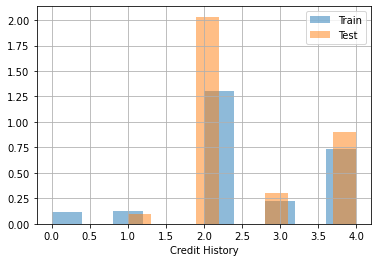

In [4]:
df_train.loc[:, 'Credit History'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Credit History'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Credit History')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Age')

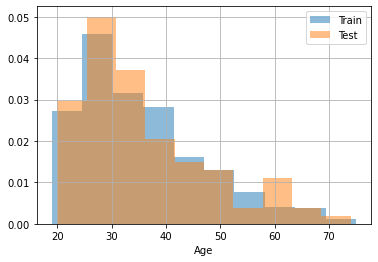

In [5]:
df_train.loc[:, 'Age'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Age'].hist(alpha=0.5, label='Test', density=True)  
plt.xlabel('Age')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Job')

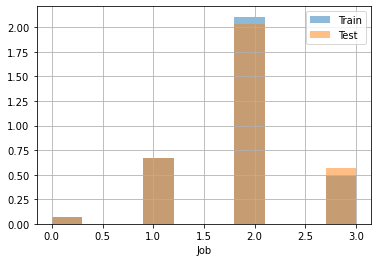

In [6]:
df_train.loc[:, 'Job'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Job'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Job')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Credit amount')

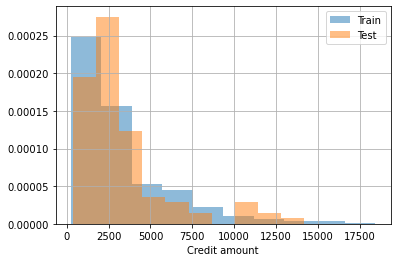

In [7]:

df_train.loc[:, 'Credit amount'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Credit amount'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Credit amount')
plt.legend()

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Saving accounts')

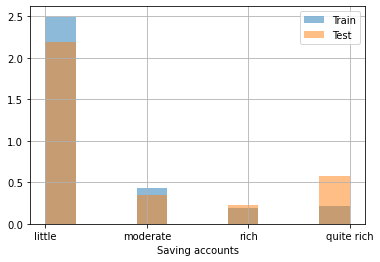

In [8]:
df_train.loc[:, 'Saving accounts'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Saving accounts'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Saving accounts')
plt.legend()

In [9]:
from scipy.stats import ks_2samp
ks_2samp(df_train['Age'], df_test['Age'])

KstestResult(statistic=0.034444444444444444, pvalue=0.9998405631849374)

In [10]:
ks_2samp(df_train['Duration'], df_test['Duration'])

KstestResult(statistic=0.06222222222222222, pvalue=0.8599548272902908)

In [11]:
df_train.head(10)

,Credit History,Age,Gender,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
233,2,25,male,1,own,little,866,18,radio/TV,good
692,2,29,male,2,own,moderate,2896,24,radio/TV,good
835,0,48,male,2,own,little,1082,12,car,bad
517,4,23,female,2,rent,little,7127,36,furniture/equipment,bad
255,3,27,male,1,own,NaN,7418,60,radio/TV,good
337,2,24,female,2,rent,NaN,1275,15,domestic appliances,bad
831,2,23,female,2,rent,little,1216,18,car,bad
824,4,35,male,3,own,little,3780,18,furniture/equipment,good
169,4,31,male,2,own,little,1935,24,business,bad
207,4,26,male,2,own,little,1424,12,domestic appliances,good


In [12]:
df_train.nunique()

Credit History       5
Age                 53
Gender               2
Job                  4
Housing              3
Saving accounts      4
Credit amount      841
Duration            33
Purpose              8
Risk                 2
dtype: int64

In [13]:
df_train.Risk.value_counts()

good    628
bad     272
Name: Risk, dtype: int64

In [14]:
df_train.Risk.value_counts()

good    628
bad     272
Name: Risk, dtype: int64

In [15]:
df_train_summ = df_train.describe()
df_train_summ

,Credit History,Age,Job,Credit amount,Duration
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,2.538889,35.516667,1.901111,3260.345556,20.838889
std,1.099924,11.289041,0.652026,2828.120791,12.012861
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,2.000000,27.000000,2.000000,1344.750000,12.000000
50%,2.000000,33.000000,2.000000,2290.000000,18.000000
75%,4.000000,42.000000,2.000000,3981.750000,24.000000
max,4.000000,75.000000,3.000000,18424.000000,72.000000


(array([407., 255.,  87.,  74.,  37.,  16.,  11.,   7.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Credit amount distribution')

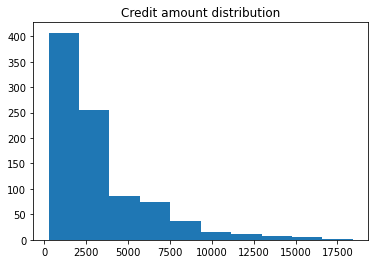

In [16]:
plt.hist(df_train['Credit amount'])
plt.title('Credit amount distribution')

In [17]:
### the credit amount is highly skewed distribution, lets analyse the extreme values beyond 3 sigma
def extreme_count(sig_factor, feat):
    sig_cutoff = df_train_summ[feat]['mean'] + sig_factor*df_train_summ[feat]['std'] 
    sig_count = len(df_train[df_train[feat] > sig_cutoff])
    print("instances of {} greater than {} sigma ({} cutoff) are {}".format(feat, sig_factor, sig_cutoff, sig_count))
    return

extreme_count(3, feat = 'Credit amount')


instances of Credit amount greater than 3 sigma (11744.707928026284 cutoff) are 22


In [18]:
extreme_count(3, feat = 'Age')

instances of Age greater than 3 sigma (69.38378825029702 cutoff) are 6


(array([137., 231., 159., 142.,  81.,  65.,  39.,  21.,  19.,   6.]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Age Distribution')

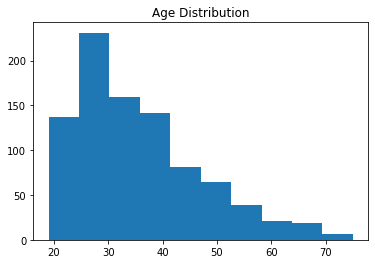

In [19]:
plt.hist(df_train['Age'])
plt.title('Age Distribution')

(array([152., 238., 305.,  50.,  81.,  14.,  45.,   2.,  12.,   1.]),
 array([ 4. , 10.8, 17.6, 24.4, 31.2, 38. , 44.8, 51.6, 58.4, 65.2, 72. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Duration Distribution')

instances of Duration greater than 3 sigma (56.87747206299391 cutoff) are 13


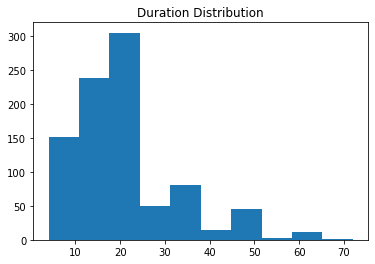

In [20]:
plt.hist(df_train['Duration'])
plt.title('Duration Distribution')
extreme_count(3, feat='Duration')

In [ ]:
#There are some outliers detected but based on the dataset description, it seems that these features may 
#be relevant. Such as, elderly people can also apply for loan with right amount of asset as mortgage, people may have credit 
## duration more than 60 years.